In [1]:
import pymysql # Importaciones necesarias para todo el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Conexión a la base de datos usando PyMySQL
    connection = pymysql.connect(user='root',
    password='Pocho1234vr',
    host='localhost',
    database='empresa',) 
    print("Connected to MySQL Server")

    # Crear un cursor para interactuar con la base de datos
    cursor = connection.cursor()

    # Consultar todas las tablas de la base de datos
    cursor.execute("SHOW TABLES;")
    tables = cursor.fetchall()

    # Crear un diccionario para almacenar dataframes
    dataframes = {}

    # Iterar sobre cada tabla y convertirla en un dataframe
    for tabla in tables:
        table_name = tabla[0]
        query = f"SELECT * FROM {table_name};"
        # Usar pandas para leer los datos
        df = pd.read_sql(query, connection)
        dataframes[table_name] = df
        print(f"DataFrame for table {table_name} created.")

except pymysql.MySQLError as e:
    print("Error while connecting to MySQL", e)


Connected to MySQL Server
DataFrame for table companies created.
DataFrame for table credit_cards created.
DataFrame for table transactions created.
DataFrame for table users created.


C:\Users\lorenzo\AppData\Local\Temp\ipykernel_2948\1530998472.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [2]:
if 'connection' in locals() and connection.open:
    connection.close()
    print("MySQL connection is closed")

MySQL connection is closed


In [3]:
tables

(('companies',), ('credit_cards',), ('transactions',), ('users',))

In [4]:
# creación de todos los dataframes
df_companies = dataframes['companies']
df_users = dataframes['users']
df_transactions = dataframes['transactions']
df_credit_cards = dataframes['credit_cards']

In [5]:
df_companies # visualizar el dataframe

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub\r
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars\r
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one\r
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site\r


In [6]:
df_users # visualizar el dataframe

,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,"Aug 23, 1992",United States,Des Moines,59464,903 Sit Ave
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,"Apr 29, 1998",United States,Columbus,56518,736-2063 Tellus St.
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,"Feb 18, 1989",United States,Kailua,77417,Ap #545-2244 Erat. Rd.
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,"Sep 26, 1998",United States,Sandy,31564,341-2821 Ultrices Av.
...,...,...,...,...,...,...,...,...,...,...
270,271,Leandra,Cherry,089-285-7016,lobortis.quis@hotmail.ca,"Sep 2, 1991",Canada,Gander,H6S 6M9,554-9293 Sollicitudin Av.
271,272,Hedwig,Gilbert,064-204-8788,sem.eget@icloud.edu,"Apr 16, 1991",Canada,Tuktoyaktuk,Q4C 3G7,"P.O. Box 496, 5145 Sapien Road"
272,273,Hilary,Ferguson,060-710-1604,sapien.molestie.orci@google.edu,"Nov 3, 1981",Canada,Pangnirtung,12T 5G4,Ap #736-4628 Cras St.
273,274,Jameson,Hunt,024-732-2321,fringilla@protonmail.com,"Jan 29, 1982",Canada,Township of Minden Hills,B6V 6N4,224-4927 Praesent Ave


In [7]:
df_transactions # visualizar el dataframe

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.918459,-12.527556
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.969489,-117.525184
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222681,-129.049880
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.359306,-100.555928
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.738145,158.298210
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.319472,-11.413491
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.012168,-64.671544
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.860453,-172.345729
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.075143,-142.241696


In [8]:
df_credit_cards # visualizar el dataframe

,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24
...,...,...,...,...,...,...,...,...,...
270,CcU-4828,5,BG11ILMJ30149367569464,4485252735942,2789,942,%B7763464626517588^KmqoxvwFiovcv^5003339322?4,%B4651147303850314=2105859161?2,09/04/22
271,CcU-4835,4,PT34592171131763200132583,3723 677744 22550,1149,680,%B6221188915952608^EnfmdemGugvnr^58053479562?5,%B8187762874317668=9107919781?6,01/08/24
272,CcU-4842,3,SA2156708581957118818229,3774 636724 83250,4655,750,%B2216216733758821^CsszvisPjqcfh^95081856902?1,%B2517312164209886=54047891?9,11/11/24
273,CcU-4849,2,SE2813123487163628531121,5223363813491514,9992,779,%B8844154447682199^JunfxuiCzhsrj^3805344275?5,%B2623983651705584=0207551226?9,03/21/25


In [9]:
# Importo directamente la tabla de products de un archivo .csv porque no la tenía en MySQL y creo el dataframe

df_products = pd.read_csv('C:/Users/lorenzo/Downloads/products (2).csv')

# Voy a comprobar si se ha importado correctamente y que columnas tiene
print(df_products.columns)

print(df_products.head())



Index(['id', 'product_name', 'price', 'colour', 'weight', 'warehouse_id'], dtype='object')
   id            product_name    price   colour  weight warehouse_id
0   1        Direwolf Stannis  $161.11  #7c7c7c     1.0         WH-4
1   2             Tarly Stark    $9.24  #919191     2.0         WH-3
2   3  duel tourney Lannister  $171.13  #d8d8d8     1.5         WH-2
3   4       warden south duel   $71.89  #111111     3.0         WH-1
4   5          skywalker ewok  $171.22  #dbdbdb     3.2         WH-0


In [10]:
print(df_products.dtypes) # Para saber si todas las columnas estan en el formato correcto

# Eliminar el símbolo $ y comas si existieran, y luego convertir a numérico
df_products["price"] = df_products["price"].str.replace('$', '', regex=False)
df_products["price"] = df_products["price"].str.replace(',', '', regex=False)

# Como price está en formato object y tiene que ser número, voy a hacer esta transformación antes de trabajar con ella
# Convertir a tipo numérico
df_products["price"] = pd.to_numeric(df_products["price"])


id                int64
product_name     object
price            object
colour           object
weight          float64
warehouse_id     object
dtype: object


In [31]:
df_products #Visualizo el dataframe

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,71.89,#111111,3.0,WH-1
4,5,skywalker ewok,171.22,#dbdbdb,3.2,WH-0
...,...,...,...,...,...,...
95,96,dooku solo,20.92,#282828,2.1,WH--91
96,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
97,98,Direwolf Littlefinger,38.33,#bababa,2.0,WH--93
98,99,the duel,151.78,#212121,1.5,WH--94


In [12]:
# Limpieza de datos de la tabla transactions

# Ver cuántos valores faltan
print(df_transactions["amount"].isnull().sum())

# Ver cuántos valores negativos hay (si no deberían haber)
print((df_transactions["amount"] < 0).sum())

print(df_transactions["amount"].describe())


0
0
count    587.000000
mean     256.735520
std      144.133895
min       15.050000
25%      131.115000
50%      257.440000
75%      389.900000
max      499.230000
Name: amount, dtype: float64


In [13]:
# Merges y nuevos dataframes

# EJERCICIOS 3 y 4: 
# Necesito la unión de las tablas de transactions y companies mediante un merge de las 2 tablas:

df_transactions_companies = pd.merge(df_transactions, df_companies, left_on = 'business_id', right_on ='company_id')

# EJERCICIO 5:

# Voy a visualizar las 2 varibles categóricas de country y declined mediante el merge de las tablas de transactions y users para ver que paises tienen el mayor número de operaciones declinadas

df_transactions_users = pd.merge(df_transactions, df_users, left_on= 'user_id' , right_on='id')

## Nivell 1

Exercici 1
Una variable numèrica.

In [14]:
#Voy a utilizar la variable numérica de amount de la tabla transactions

print(df_transactions.dtypes) # Para saber si la columna amount está en formato numérico


id                     object
card_id                object
business_id            object
timestamp      datetime64[ns]
amount                float64
declined                int64
product_ids            object
user_id                 int64
lat                   float64
longitude             float64
dtype: object


In [15]:
#Como la columna amount está en formato object (texto) se debe de convertir a formato numérico:

df_transactions["amount"] = pd.to_numeric(df_transactions["amount"])


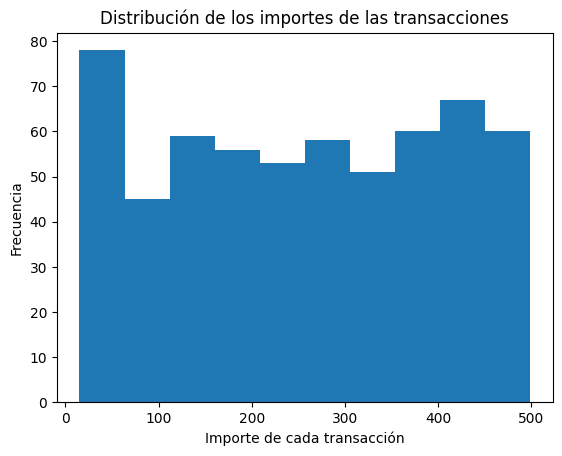

In [16]:

df_transactions["amount"].plot.hist() 

plt.xlabel("Importe de cada transacción")  # Etiqueta en eje X
plt.ylabel("Frecuencia")  # Etiqueta en eje Y
plt.title("Distribución de los importes de las transacciones")  # Título del gráfico
plt.show()

# Interpretación del resultado: Se muestra el importe de cada transacción en el eje X y la frecuencia o número de transacciones dentro de ese importe (count). Cada barra indica el número de veces, frecuencia, en el que se ha repetido el importe de la transacción.




Exercici 2
Dues variables numèriques.

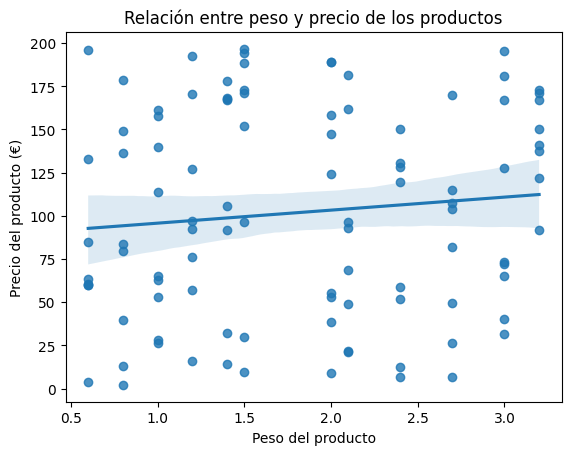

In [17]:
# Voy a usar las 2 variables numéricas de la tabla products de peso y precio para saber si hay relación entre el peso de los productos y su precio
# Hago un gráfico scatteplot con una línea de tendencia

sns.regplot(data=df_products, x='weight', y='price')


plt.xlabel("Peso del producto")
plt.ylabel("Precio del producto (€)")
plt.title("Relación entre peso y precio de los productos")
plt.show()

# Interpretación del resultado: la línea de tendencia ascendente indica que a más peso tiene el producto, más precio tiene también


Exercici 3
Una variable categòrica.

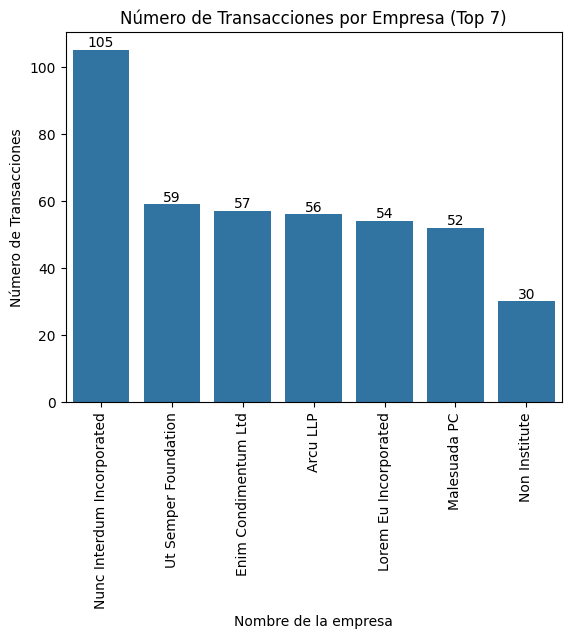

In [18]:
# Como variable categórica, voy a analizar cuántas transacciones hay por cada empresa. Variable categórica: company_name de la tabla companies.
# Para ello necesito hacer el merge entre las tablas companies y transactions para visualizar el nombre de las empresas y el total de transaciones.

# Top 7 de las empresas con mayor número de transacciones:

# Para facilitar la visibilidad en un gráfico, voy a cortar por las 7 empresa con más transacciones porque sino no se ven los nombres claros al ser tantas empresas

# Obtener las 7 empresas con más transacciones (en número de transacciones)
top_7_empresas = df_transactions_companies['company_name'].value_counts().head(7).index

# Filtrar el DataFrame original para incluir solo esas empresas
df_top_7 = df_transactions_companies[df_transactions_companies['company_name'].isin(top_7_empresas)]

# Crear el gráfico countplot y asignarlo a ax para después añadir los números encima de las barras
ax = sns.countplot(data=df_top_7, x='company_name', order=top_7_empresas)

plt.xticks(rotation=90) # Rotar etiquetas del eje X para mayor legibilidad
plt.xlabel('Nombre de la empresa')
plt.ylabel('Número de Transacciones')
plt.title('Número de Transacciones por Empresa (Top 7)')
# Agregar el número encima de cada barra usando bar_label
ax.bar_label(ax.containers[0])
plt.show()

# Interpretación del resultado: Top de las 7 empresas con mayor número de transacciones ordenadas de mayor a menor


Exercici 4
Una variable categòrica i una numèrica.

In [19]:
# Voy a utilizar la variable categorica de company name y la numérica de amount para saber si algunas empresas tienen transacciones de mayores importes que otras.

# Voy a usar el merge anterior de las tablas de transactions y companies:

#Para facilitar la visibilidad en un gráfico, voy a cortar por las 10 empresa con transacciones más altas porque sino no se ven los nombres claros al ser tantas empresas

# Agrupar por empresa y sumar el importe total de transacciones
df_total_amounts = df_transactions_companies.groupby('company_name')['amount'].sum().reset_index()

# Ordenar de mayor a menor por el importe total
df_total_amounts = df_total_amounts.sort_values(by='amount', ascending=False)

# Seleccionar las 10 empresas con el mayor total de importes
top_10_companies = df_total_amounts.head(10)

# Filtrar las transacciones para incluir solo las empresas seleccionadas
df_transactions_top_10 = df_transactions_companies[df_transactions_companies['company_name'].isin(top_10_companies['company_name'])]



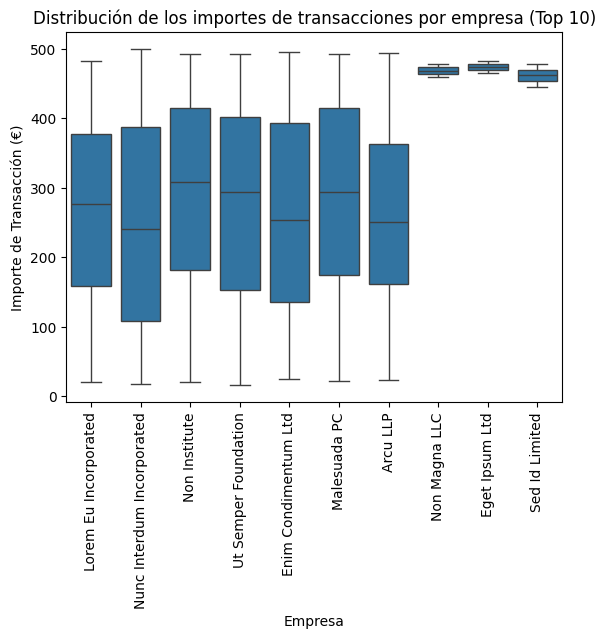

In [20]:
# Graficar el boxplot para las 10 empresas con mayores importes de transacción

sns.boxplot(data=df_transactions_top_10, x='company_name', y='amount')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje X para que se puedan leer mejor
plt.xlabel("Empresa")
plt.ylabel("Importe de Transacción (€)")
plt.title("Distribución de los importes de transacciones por empresa (Top 10)")
plt.show()


# Interpretación del resultado: Las primeras empresas tienen una gran diversidad de transacciones,con productos de diferentes precios o y las últimas empresas tienen transacciones con menos variabilidad en los importes, pero generan mayores ingresos por transacción ya que los importes son más altos.

Exercici 5
Dues variables categòriques.

In [21]:
# Voy a visualizar las 2 varibles categóricas de country y declined mediante el merge de las tablas de transactions y users para ver que paises tienen el mayor número de operaciones declinadas

df_transactions_users = pd.merge(df_transactions, df_users, left_on= 'user_id' , right_on='id')

In [22]:
# Revisar si todos los user_id de transactions existen en users
set_user_ids_transactions = set(df_transactions['user_id'])
set_user_ids_users = set(df_users['id'])

# ¿Están todos los IDs de transactions en la tabla de users?
set_user_ids_transactions.issubset(set_user_ids_users)


True

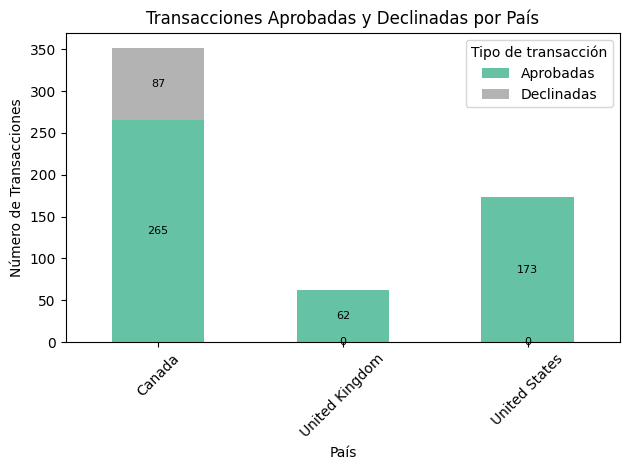

In [23]:
# Agrupar por país y si fue declinada (0 o 1)
df_country_declined = df_transactions_users.groupby(['country', 'declined']).size().unstack(fill_value=0)


ax = df_country_declined.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('País')
plt.ylabel('Número de Transacciones')
plt.title('Transacciones Aprobadas y Declinadas por País')
plt.legend(title='Tipo de transacción', labels=['Aprobadas', 'Declinadas'])
plt.xticks(rotation=45)
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8) # Para añadir el número de transacciones aprobadas o declinadas
plt.show()

# Interpretación del resultado: Canada tiene 265 transacciones aprobadas y 87 declinadas, USA tiene 173 aprobadas, mientras que UK tiene 62 aprobadas y una mayor proporción de transacciones declinadas.



Exercici 6
Tres variables.

In [24]:
# Voy a hacer un estudio sobre los productos más vendidos y ver en qué países se venden más.
# Las 3 variables usadas son: product_name, cantidad de veces vendida (count) y country.
# Para ello necesito hacer el merge entre las tablas de products y transactions y después con la tabla users para añadir los países (country)

# transactions (que tiene los product_ids), products (donde está product_name) y users (donde está country)

# Crear una copia de los dataframes para no alterar los originales:

df_transactions_copy = df_transactions.copy()
df_products_copy = df_products.copy()

# Asegurar que las columnas esten como un texto:
df_transactions_copy['product_ids'] = df_transactions_copy['product_ids'].astype(str)
df_products_copy['id'] = df_products_copy['id'].astype(str)

# Eliminar espacios en blanco
df_transactions_copy['product_ids'] = df_transactions_copy['product_ids'].str.strip()
df_products_copy['id'] = df_products_copy['id'].str.strip()

# Dividir los products_id de la tabla de transactions en listas

df_transactions_copy['product_ids'] = df_transactions_copy['product_ids'].str.split(',')

# Explode() para que cada producto tenga su fila individual

df_exploded = df_transactions_copy.explode('product_ids')

# Renombrar la columna de products_id a id para que coincida con la tabla de products

df_exploded.rename(columns={'product_ids': 'product_id'}, inplace=True)

# Merge transactions y products

df_transactions_products = pd.merge(df_exploded, df_products_copy, left_on='product_id', right_on='id', how='left')

# Merge transactions, products y users

df_transactions_products_users = pd.merge(df_transactions_products, df_users, left_on='user_id', right_on='id', how='left')

# Agrupar por producto y país, y contamos cuántas veces aparece cada combinación.

df_productos_por_pais = df_transactions_products_users.groupby(['product_name', 'country']).size().reset_index(name='ventas')

# Esto agrupa el DataFrame por cada combinación única de product_name y country, el size muestra cuantas veces aparece la combinación de product_name y país y el "ventas"ventas es el conteo de cuántas veces se vendió ese producto en ese país.

# Agrupar por producto y sumar las ventas totales
df_ventas_por_producto = df_productos_por_pais.groupby('product_name')['ventas'].sum().reset_index()

# Ordenar los productos por la cantidad de ventas de mayor a menor
df_ventas_por_producto = df_ventas_por_producto.sort_values(by='ventas', ascending=False)

# Seleccionar los 5 productos más vendidos
top_5_productos = df_ventas_por_producto.head(5)

# Filtrar los datos para quedarnos solo con los 5 productos más vendidos
df_top_5_productos = df_productos_por_pais[df_productos_por_pais['product_name'].isin(top_5_productos['product_name'])]

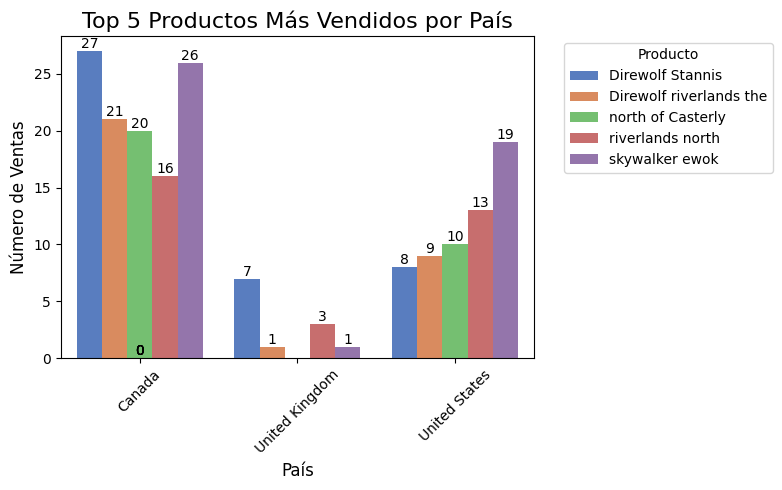

In [25]:
plt.figure(figsize=(8, 5)) #tamaño del gráfico

# Gráfico de barras apiladas
ax = sns.barplot(data=df_top_5_productos, x='country', y='ventas', hue='product_name', errorbar=None, palette='muted')
plt.title('Top 5 Productos Más Vendidos por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Número de Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
for p in ax.patches: # Para indicar el número encima de cada barra
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


Exercici 7
Graficar un Pairplot.

In [26]:
# Crear nuevo dataframe con solo las columnas necesarias (a partir del df de las 3 tablas: products, transactions y users unidas)
df_pairplot = df_transactions_products_users[['amount', 'price', 'weight', 'country']].dropna()


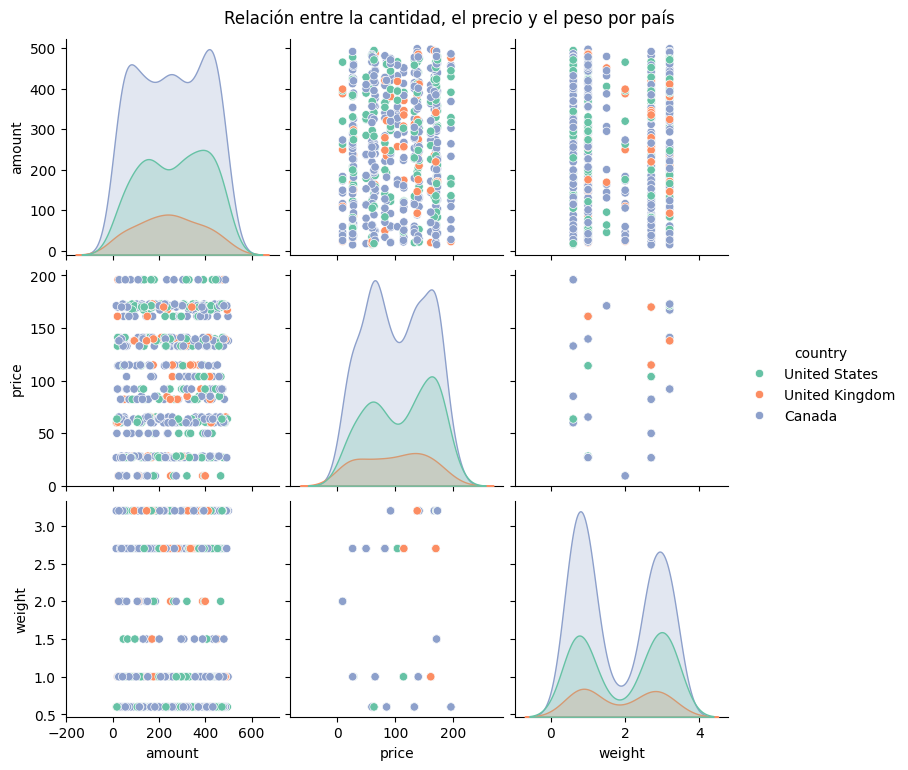

In [27]:
# Graficar un Pairplot
sns.pairplot(df_pairplot, hue='country', palette='Set2')

plt.suptitle('Relación entre la cantidad, el precio y el peso por país', y=1.02)
plt.show()


## Nivell 2
Exercici 1
Correlació de totes les variables numèriques.

In [28]:
# Ver solo las columnas numéricas del DataFrame combinado que une las 3 tablas: transactions, users y products.
df_transactions_products_users.select_dtypes(include='number').columns


Index(['amount', 'declined', 'user_id', 'lat', 'longitude', 'price', 'weight',
       'id'],
      dtype='object')

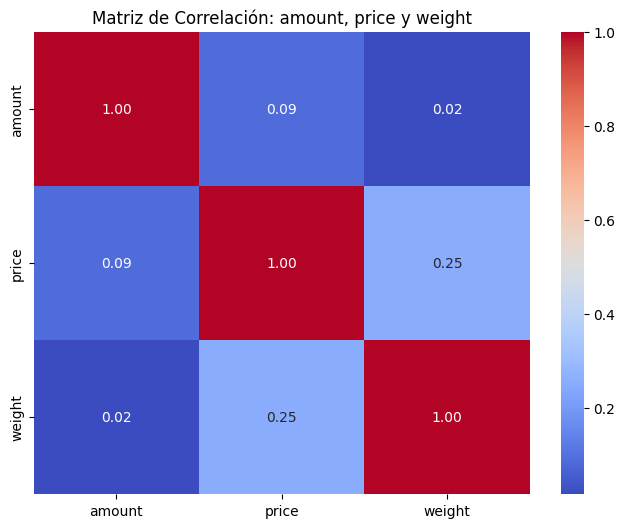

In [29]:
# Graficar la matriz de correlación con las variables numéricas que tiene sentido mostrar:

df_correlacion = df_transactions_products_users[['amount', 'price', 'weight']]

plt.figure(figsize=(8, 6))
sns.heatmap(df_correlacion.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación: amount, price y weight')
plt.show()

# Vemos una relación positiva de 0.25 entre el precio y el peso que significa que a más peso más precio tiene el producto. 

Exercici 2
Implementa un jointplot.

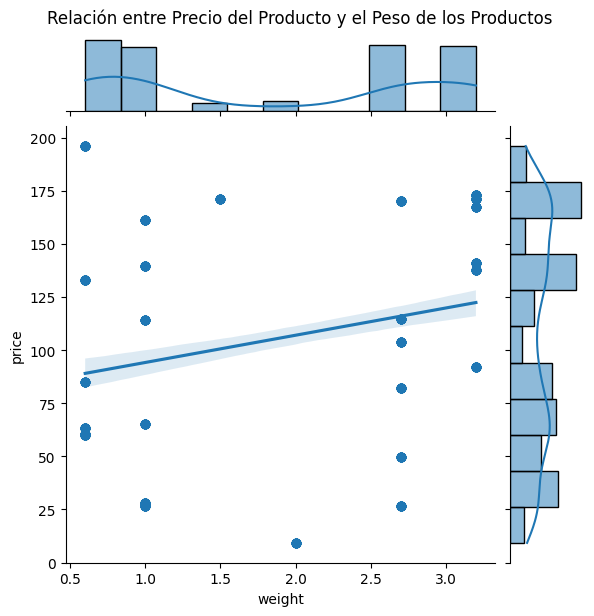

In [30]:
# Un Jointplot permite visualizar la relación entre dos variables numéricas y, además, ver su distribución individual.

# Crear el jointplot
sns.jointplot(data=df_transactions_products_users, x='weight', y='price',kind='reg', height=6)

plt.suptitle('Relación entre Precio del Producto y el Peso de los Productos', y=1.02)
plt.show()
